### Pytorch imports

In [14]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np
print(torch.cuda.is_available())

True


### Creating Data

In [15]:
weight = 0.7
bias = 0.3
step = 0.02
start = 0
end = 1
X = torch.arange(start=start, end=end, step=step).unsqueeze(dim=1)
y = weight * X + bias 
X, y

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800],
         [0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.3000],
         [0.3140],
         [

### Splitting Dataset

In [16]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data 

In [17]:
def plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=None):
    plt.figure(figsize=(10, 6))
    plt.scatter(train_data,train_labels, c="b", label="Training data")
    plt.scatter(test_data,test_labels, c="g", label="Testing data")
    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", label="Predictions")
    plt.legend()

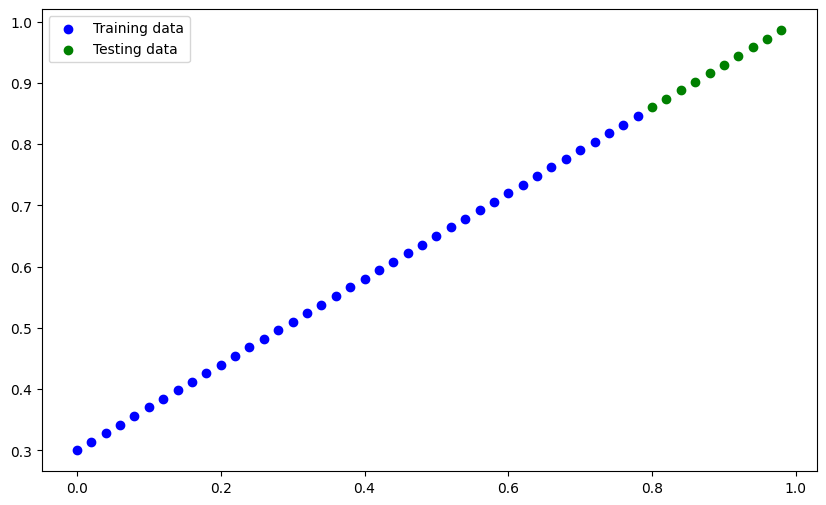

In [18]:
plot_predictions()

### Creating our model

In [19]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, dtype=torch.float32, requires_grad=True))
        self.bias = nn.Parameter(torch.randn(1, dtype=torch.float32, requires_grad=True))
    def forward(self, x:torch.Tensor) -> torch.Tensor:
        return x * self.weights + self.bias

### Instantiation 

In [20]:
torch.manual_seed(42)
model = LinearRegressionModel()

### Plotting model predictions

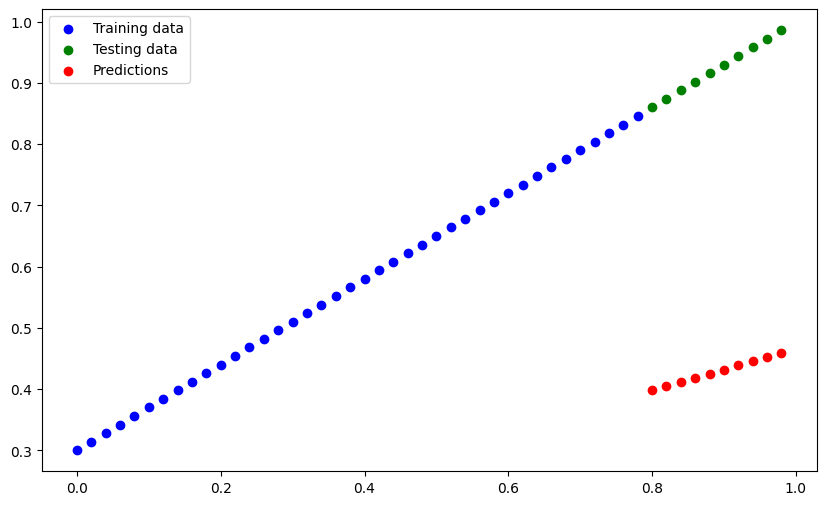

In [21]:
with torch.inference_mode():
    predictions = model(X_test)
    plot_predictions(predictions=predictions)

## Setting up loss function and an optimizer

In [22]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)


In [24]:
epochs = 200
epoch_count = []
loss_values = []
test_loss_values = []

for epoch in range(epochs):
    model.train()
    y_preds = model(X_train)
    loss = loss_fn(y_preds,y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    model.eval()
    with torch.inference_mode():
        test_pred = model(X_test)
        test_loss = loss_fn(test_pred,y_test)
        if epoch % 10 == 0:
            epoch_count.append(epoch)
            test_loss_values.append(test_loss)
            loss_values.append(loss)
            print(f"epoch {epoch} | test loss {test_loss} | loss {loss}")
            
    

epoch 0 | test loss 0.48106518387794495 | loss 0.31288138031959534
epoch 10 | test loss 0.3463551998138428 | loss 0.1976713240146637
epoch 20 | test loss 0.21729660034179688 | loss 0.08908725529909134
epoch 30 | test loss 0.14464017748832703 | loss 0.053148526698350906
epoch 40 | test loss 0.11360953003168106 | loss 0.04543796554207802
epoch 50 | test loss 0.09919948130846024 | loss 0.04167863354086876
epoch 60 | test loss 0.08886633068323135 | loss 0.03818932920694351
epoch 70 | test loss 0.0805937647819519 | loss 0.03476089984178543
epoch 80 | test loss 0.07232122868299484 | loss 0.03132382780313492
epoch 90 | test loss 0.06473556160926819 | loss 0.02788739837706089
epoch 100 | test loss 0.05646304413676262 | loss 0.024458957836031914
epoch 110 | test loss 0.04819049686193466 | loss 0.021020207554101944
epoch 120 | test loss 0.04060482233762741 | loss 0.01758546568453312
epoch 130 | test loss 0.03233227878808975 | loss 0.014155393466353416
epoch 140 | test loss 0.024059748277068138 |

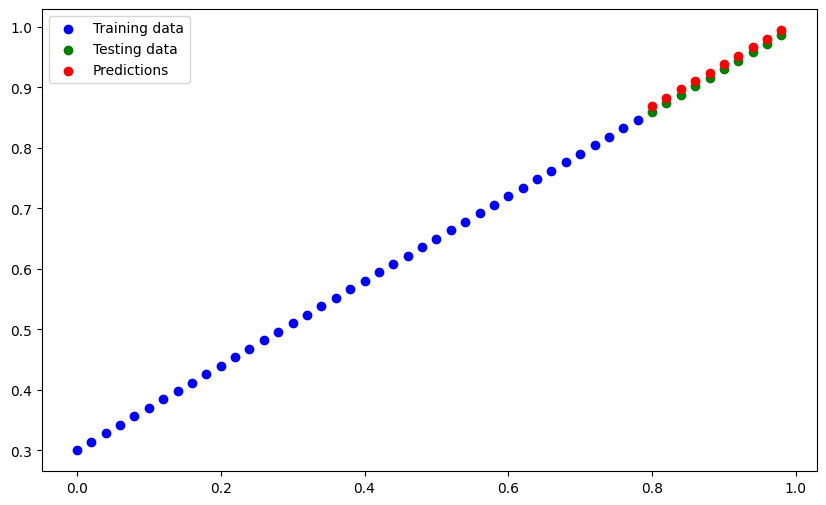

In [25]:
with torch.inference_mode():
    predictions = model(X_test)
    plot_predictions(predictions=predictions)

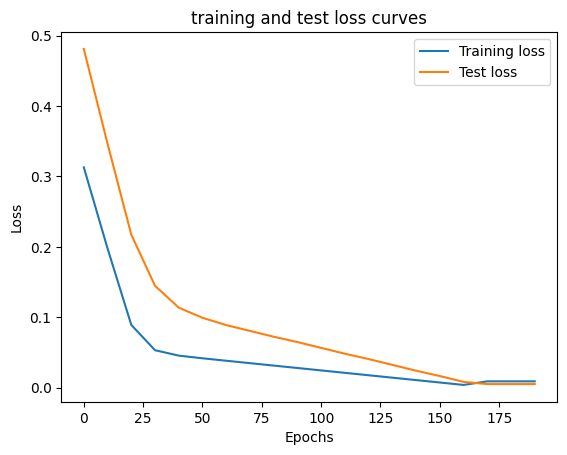

In [27]:
plt.plot(
    epoch_count,
    np.array(torch.tensor(loss_values).cpu().numpy()),
    label="Training loss",
)
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

In [ ]:
from pathlib import Path
MODEL_PATH = Path("new_models")
MODEL_PATH.mkdir(exist_ok=True)
MODEL_NAME = "linear_regression_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
torch.save(obj=model.state_dict(), f=MODEL_SAVE_PATH)
